Part 1 - Importing raw data
===========================

The data for our tutorial on processing dual energy X-ray computed tomography (CT)
is the C04B21 carbonate core CT dataset. This dataset is part of a collection of dual energy medical CT scans of 3 ft carbonate core samples, made available by Rodolfo Victor at the [Digital Rocks Portal](https://www.digitalrocksportal.org/). 
The scans were acquired with a voxel size of (0.488 X 0.488 X 1.25) mm at the Petrobras Research Center. 

The C04B21 dataset represents a carbonate core sample imaged using dual-energy CT, 
which provides valuable information about the sample's internal structure and composition. 
We will use this data to demonstrate the processing and analysis capabilities of RockVerse.

.. note:: 
   If you plan to use this data, please remember to 
   [cite the data](https://www.digitalrocksportal.org/projects/102/cite/)
   and the
   [related publications](https://www.digitalrocksportal.org/projects/102/publications/).

To download the data, visit the Dual-energy medical CT in carbonate rocks project on the Digital Rocks Portal:
https://www.digitalrocksportal.org/projects/102. Click on the low-energy image `C04B21_Raw100keV`.

<img src="import_C04B21_dualenergy-img1.jpg" width="250"/>
 
Pay attention to the metadata, as we will need this information later in the tutorial. 
Note that this is ImageJ/Fiji exported raw data, so it is in Fortran file order.
Click `Action->Download File`.

<img src="import_C04B21_dualenergy-img2.jpg" width="250"/>

Repeat the procedure and download the high-energy image `C04B21_Raw140keV`.

Now, let's import the raw files into RockVerse. In this example, we'll use 8 chunks by halving the number of voxels in each direction:

In [ ]:
import rockverse as rv

# Importing low energy raw image as a RockVerse voxel image
C04B21_Raw100keV =  rv.voxel_image.import_raw(
    rawfile='/path/to/rawdata/dual_energy_carbonate/C04B21Raw100keV.raw',
    raw_file_order='F',                  #<- Raw file is in Fortran file order
    store='/path/to/imported/dual_energy_carbonate/C04B21Raw100keV',
    shape=(512, 512, 738),               #<- From metadata, image size (nx, ny, nz)
    chunks=(256, 256, 369),              #<- Our choice of chunk size. Will give a 2x2x2 chunk grid
    dtype='<i2',                         #<- From metadata, little-endian 16-bit signed integer
    offset=0,                            #<- From metadata
    voxel_length=(0.488, 0.488, 1.25),   #<- From metadata
    voxel_unit='mm',                     #<- From metadata
    field_name='Low energy attenuation', #<- Our choice for field name (X-ray attenuation)
    field_unit='H.U.',                   #<- field units (Hounsfield units)
    description='Low energy X-ray CT attenuation', #<- General data description
    overwrite=True                       #<- Overwrite if file exists in disk
    )

# Importing high energy raw image as a RockVerse voxel image
C04B21_Raw140keV =  rv.voxel_image.import_raw(
    rawfile='/path/to/rawdata/dual_energy_carbonate/C04B21Raw140keV.raw',
    raw_file_order='F',
    store='/path/to/imported/dual_energy_carbonate/C04B21Raw140keV',
    shape=(512, 512, 738),
    chunks=(256, 256, 369),
    dtype='<i2',
    offset=0,
    voxel_length=(0.488, 0.488, 1.25),
    voxel_unit='mm',
    field_name='High energy attenuation',
    field_unit='H.U.',
    description='High energy X-ray CT attenuation',
    overwrite=True
    )

[2025-02-25 11:14:51] (Low energy attenuation) Importing raw file: 100%|>>>>>>>>>>| 8/8 [00:08<00:00,  1.05s/chunk]
[2025-02-25 11:14:59] (High energy attenuation) Importing raw file: 100%|>>>>>>>>>>| 8/8 [00:08<00:00,  1.08s/chunk]


The images are now available as RockVerse voxel images on disk, at the path specified in the `store` parameter. 
Let's do a quick visualization using RockVerse's [orthogonal viewer](../orthogonal_viewer.ipynb):

[2025-02-25 11:24:43] Histogram Low energy attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:01<00:00,  6.16chunk/s]
[2025-02-25 11:24:44] Histogram Low energy attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:05<00:00,  1.54chunk/s]
[2025-02-25 11:24:53] Histogram High energy attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:01<00:00,  6.26chunk/s]
[2025-02-25 11:24:54] Histogram High energy attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:05<00:00,  1.59chunk/s]


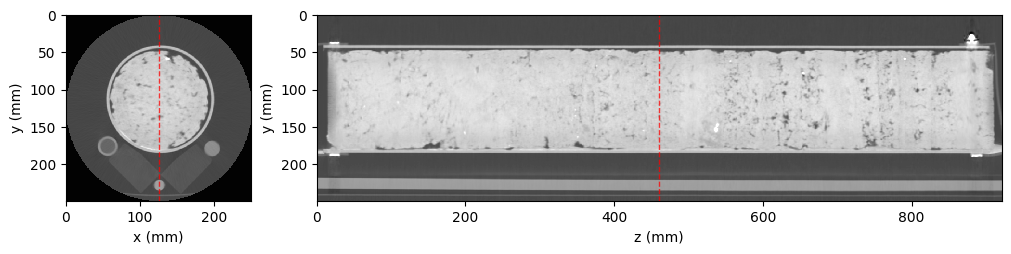

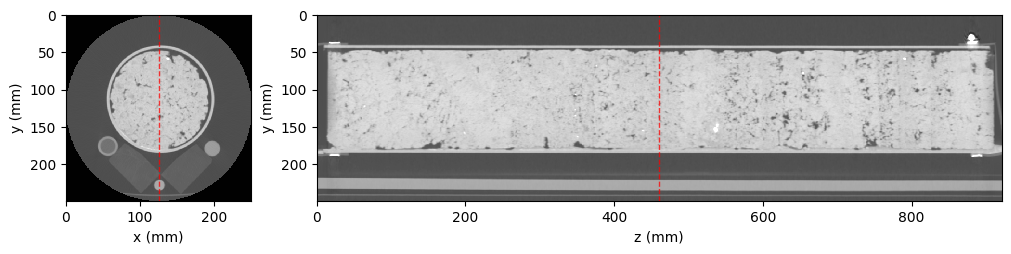

In [6]:
# Create an OrthogonalViewer for the low-energy image
lowE_viewer = rv.OrthogonalViewer(C04B21_Raw100keV,
                                 show_xz_plane=False,
                                 show_histogram=False,
                                 )

# Create an OrthogonalViewer for the high-energy image
highE_viewer = rv.OrthogonalViewer(C04B21_Raw140keV,
                                 show_xz_plane=False,
                                 show_histogram=False,
                                 )

# The Matplotlib figure object is available through the viewer figure property
lowE_viewer.figure.set_size_inches(10, 10)
highE_viewer.figure.set_size_inches(10, 10)

Now that we have successfully imported the raw images, we can move on to the 
[next part of this tutorial](./dual_energy_tutorial_prepare_data.ipynb).